<a href="https://colab.research.google.com/github/itsfarahbmt/AgronomicMLPipeline/blob/main/AgronomicPipeline_Boumaout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP : Pipeline d'Ingestion de Données avec Scikit-learn et Pandas sur des Données Agronomiques

> Ajouter une citation

> Ajouter une citation






Les Importations

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib
import os
import glob
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

*note :  Veuillez executer le code ci dessous et charger les fichiers envoyés*

In [ ]:
from google.colab import files
uploaded = files.upload()  # Ouvre une fenêtre pour uploader des fichiers

TypeError: 'NoneType' object is not subscriptable

In [ ]:
!ls /content/ # verification que les fichier sont correctement uploader


'arachides&nouveau_riz.xlsx'	       cleaned_blé2.xlsx       cleaned_leRiz.csv    leRiz.csv
 blé2.xlsx			       cleaned_blé.csv	       cleaned_mais.xlsx    mais.xlsx
 blé.csv			       cleaned_crop_data.csv   cleaned_potato.csv   potato.csv
'cleaned_arachides&nouveau_riz.xlsx'   cleaned_leRiz2.csv      leRiz2.csv	    sample_data


**Chargement des données brutes**

● Récupération des fichiers de données.
● Vérification de l’intégrité et du format des fichiers.

In [ ]:

data_folder = "/content/"
# Vérification et création du dossier si inexistant
if not os.path.exists(data_folder):
    print(f"📂 Création du dossier {data_folder}...")
    os.makedirs(data_folder)
# Dictionnaire de renommage des colonnes
rename_mappings = {
    "arachides&nouveau_riz.xlsx": {
        "CropType": "TypeCulture",
        "CropDays": "JoursCulture",
        "Soil Moisture": "HumiditeSol",
        "Soil Temperature": "TemperatureSol",
        "Temperature": "Temperature",
        "Humidity": "Humidite",
        "Irrigation(Y/N)": "Irrigation"
    },
    "blé.csv": {
        "water req": "BesoinEau",
        "month": "Mois",
        "Min Temp": "TempMin",
        "Max Temp": "TempMax",
        "Humidity": "Humidite",
        "Wind": "Vent",
        "Sun": "Ensoleillement",
        "Rad": "Radiation",
        "rain": "Pluie",
        "altitude": "Altitude",
        "latitude": "Latitude",
        "crop": "Culture",
        "soil": "Sol",
        "city": "Ville"
    },
    "blé2.xlsx": {
        "Soil Type": "TypeSol",
        "Water Requirement": "BesoinEau",
        "Crop Yield": "RendementCulture"
    },
    "mais.xlsx": {
        "Plant Height": "HauteurPlante",
        "Fertilizer Used": "EngraisUtilise",
        "Temperature": "Temperature",
        "Humidity": "Humidite"
    },
    "leRiz.csv": {
        "Soil Moisture": "HumiditeSol",
        "Soil Temperature": "TemperatureSol",
        "Rainfall": "Precipitations"
    },
    "leRiz2.csv": {
        "Crop Type": "TypeCulture",
        "Growth Days": "JoursCroissance",
        "Yield": "Rendement"
    },
    "potato.csv": {
        "Tuber Size": "TailleTubercule",
        "Soil pH": "pHSol",
        "Pest Control": "LutteAntiparasitaire"
    }
}
# Fonction pour charger, traiter et sauvegarder les fichiers
def process_file(input_filename, output_filename):
    file_path = os.path.join(data_folder, input_filename)

    if not os.path.exists(file_path):
        print(f"Erreur : Le fichier {file_path} n'existe pas.")
        return

    print(f"\n Traitement du fichier : {file_path}")

    # Déterminer le type de fichier
    file_ext = os.path.splitext(file_path)[1].lower()

    if file_ext == ".csv":
        file_type = "csv"
    elif file_ext in [".xls", ".xlsx"]:
        file_type = "excel"
    else:
        print(f" Format non supporté : {file_path}")
        return

    try:
        # Chargement du fichier
        if file_type == "csv":
            try:
                df = pd.read_csv(file_path, encoding="utf-8")
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding="latin-1")  # Fallback si problème d'encodage
        else:
            df = pd.read_excel(file_path)

        if df.empty:
            print(f"Le fichier {file_path} est vide.")
            return

        # Affichage de la forme initiale des données
        print(f" {df.shape[0]} lignes, {df.shape[1]} colonnes avant traitement.")

        # Traitement spécifique pour "arachides&nouveau_riz.xlsx"
        if input_filename == "arachides&nouveau_riz.xlsx":
            if "CropType" in df.columns:
                    print(f" Avant remplacement CropType :\n{df['CropType'].value_counts()}")

                    df["CropType"] = df["CropType"].replace({1: "paddy", 2: "ground nuts"})

                    print(f" Après remplacement CropType :\n{df['CropType'].value_counts()}")
            else:
                    print("'CropType' non trouvé dans les colonnes !")


    # Correction de Irrigation(Y/N)
            if "Irrigation(Y/N)" in df.columns:
              df["Irrigation(Y/N)"] = df["Irrigation(Y/N)"].replace({1: "Yes", 0: "No"})

        # Suppression des colonnes inutiles
        df = df.loc[:, ~df.columns.str.contains("Unnamed", na=False)]

        # Sauvegarde du fichier nettoyé
        output_path = os.path.join(data_folder, output_filename)
        if file_type == "csv":
            df.to_csv(output_path, index=False, encoding="utf-8")
        else:
            df.to_excel(output_path, index=False)

        print(f" Données nettoyées enregistrées sous : {output_path}")
        print(f" {df.shape[0]} lignes, {df.shape[1]} colonnes après traitement.")

    except Exception as e:
        print(f" Erreur lors du traitement de {file_path} : {e}")

# ---------------------------------------------
# Traitement du fichier concerné uniquement
# ---------------------------------------------
process_file("arachides&nouveau_riz.xlsx", "cleaned_arachides&nouveau_riz.xlsx")
process_file("blé2.xlsx", "cleaned_blé2.xlsx")
process_file("mais.xlsx", "cleaned_mais.xlsx")
process_file("blé.csv", "cleaned_blé.csv")
process_file("leRiz.csv", "cleaned_leRiz.csv")
process_file("leRiz2.csv", "cleaned_leRiz2.csv")
process_file("potato.csv", "cleaned_potato.csv")


print("\n✅ Traitement terminé.")



🔄 Renommage des colonnes pour cleaned_arachides&nouveau_riz.xlsx
✅ Modifications enregistrées dans cleaned_arachides&nouveau_riz.xlsx
📊 7 colonnes après normalisation et suppression des doublons.

🔄 Renommage des colonnes pour cleaned_blé.csv
✅ Modifications enregistrées dans cleaned_blé.csv
📊 14 colonnes après normalisation et suppression des doublons.

🔄 Renommage des colonnes pour cleaned_blé2.xlsx
✅ Modifications enregistrées dans cleaned_blé2.xlsx
📊 15 colonnes après normalisation et suppression des doublons.

🔄 Renommage des colonnes pour cleaned_leRiz.csv
✅ Modifications enregistrées dans cleaned_leRiz.csv
📊 14 colonnes après normalisation et suppression des doublons.

🔄 Renommage des colonnes pour cleaned_leRiz2.csv
✅ Modifications enregistrées dans cleaned_leRiz2.csv
📊 15 colonnes après normalisation et suppression des doublons.

🔄 Renommage des colonnes pour cleaned_mais.xlsx
✅ Modifications enregistrées dans cleaned_mais.xlsx
📊 15 colonnes après normalisation et suppression

** Standardisation des noms de colonnes **

● Nettoyage et renommer des colonnes pour assurer la cohérence.

In [ ]:

# Dossier contenant les fichiers nettoyés
data_folder = "/content/"
# Standardisation des noms de colonnes pour la fusion
common_column_names = {
    "CropType": "Culture",
    "CropDays": "JoursCulture",
    "Soil Moisture": "HumiditeSol",
    "Soil Temperature": "TemperatureSol",
    "Temperature": "Temperature",
    "Humidity": "Humidite",
    "Irrigation(Y/N)": "Irrigation",

    "water req": "BesoinEau",
    "month": "Mois",
    "Min Temp": "TempMin",
    "Max Temp": "TempMax",
    "Wind": "Vent",
    "Sun": "Ensoleillement",
    "Rad": "Radiation",
    "rain": "Pluie",
    "Rain": "Pluie",  # Harmonisation de la casse
    "altitude": "Altitude",
    "latitude": "Latitude",
    "longitude": "Longitude",  # Ajout pour uniformisation
    "crop": "Culture",
    "soil": "Sol",
    "city": "Ville",
    "CITY": "Ville"  # Harmonisation casse et uniformisation
}

# Fonction pour renommer les colonnes et enlever les doublons
def rename_columns(input_filename):
    file_path = os.path.join(data_folder, input_filename)

    if not os.path.exists(file_path):
        print(f" Erreur : Le fichier {file_path} n'existe pas.")
        return

    print(f"\nRenommage des colonnes pour {input_filename}")

    # Déterminer le type de fichier
    file_ext = os.path.splitext(file_path)[1].lower()
    if file_ext == ".csv":
        df = pd.read_csv(file_path, encoding="utf-8")
    else:
        df = pd.read_excel(file_path)

    if df.empty:
        print(f" Le fichier {input_filename} est vide.")
        return

    # Renommage des colonnes
    df.rename(columns=common_column_names, inplace=True)

    # Suppression des colonnes inconnues (éviter les erreurs de fusion)
    df = df[[col for col in common_column_names.values() if col in df.columns]]

    # Suppression des colonnes en double
    df = df.loc[:, ~df.columns.duplicated()]

    # Sauvegarde du fichier modifié (sans créer de nouveau fichier)
    if file_ext == ".csv":
        df.to_csv(file_path, index=False, encoding="utf-8")
    else:
        df.to_excel(file_path, index=False)

    print(f" Modifications enregistrées dans {input_filename}")
    print(f" {df.shape[1]} colonnes après normalisation et suppression des doublons.")

# Liste des fichiers nettoyés à traiter
cleaned_files = [
    "cleaned_arachides&nouveau_riz.xlsx",
    "cleaned_blé.csv",
    "cleaned_blé2.xlsx",
    "cleaned_leRiz.csv",
    "cleaned_leRiz2.csv",
    "cleaned_mais.xlsx",
    "cleaned_potato.csv"
]

# Exécution du renommage pour chaque fichier
for file in cleaned_files:
    rename_columns(file)

print("\n Renommage terminé, tous les fichiers sont mis à jour.")


 ** Fusion des Données **

● Fusion des datasets

In [ ]:
data_folder = "/content/" # Aller au dossier parent, puis dans data
output_file = os.path.join(data_folder, "resultat_fusion.csv")  # Fichier fusionné

# Vérifier si le dossier data existe
if not os.path.exists(data_folder):
    print(f"Erreur : Le dossier {data_folder} n'existe pas.")
    exit()

# Lister les fichiers dans le dossier data
csv_files = glob.glob(os.path.join(data_folder, "cleaned_*.csv"))
xlsx_files = glob.glob(os.path.join(data_folder, "cleaned_*.xlsx"))

# Charger tous les fichiers en DataFrames
dfs = []

for file in csv_files:
    df = pd.read_csv(file, dtype=str)  # Charger CSV avec les valeurs en string pour éviter les conflits
    dfs.append(df)

for file in xlsx_files:
    df = pd.read_excel(file, dtype=str)  # Charger Excel avec les valeurs en string
    dfs.append(df)

# Vérifier s'il y a des fichiers valides
if dfs:
    # Fusionner tous les DataFrames en alignant les colonnes
    df_final = pd.concat(dfs, ignore_index=True, sort=False)

    # Remplacer les valeurs vides par "NA"
    df_final.fillna("NA", inplace=True)

    # Sauvegarder le fichier fusionné
    df_final.to_csv(output_file, index=False)

    print(f"Fusion terminée ! Résultat enregistré dans {output_file}")
    print(df_final.info())
    print(df_final.head())

else:
    print(f"Aucun fichier valide trouvé dans {data_folder}.")


Fusion terminée ! Résultat enregistré dans /content/resultat_fusion.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Culture            630 non-null    object
 1   Humidite           630 non-null    object
 2   BesoinEau          630 non-null    object
 3   Mois               630 non-null    object
 4   TempMin            630 non-null    object
 5   TempMax            630 non-null    object
 6   Vent               630 non-null    object
 7   Ensoleillement     630 non-null    object
 8   Radiation          630 non-null    object
 9   Pluie              630 non-null    object
 10  Altitude           630 non-null    object
 11  Latitude           630 non-null    object
 12  Longitude          630 non-null    object
 13  Sol                630 non-null    object
 14  Ville              630 non-null    object
 15  CropType           

**Nettoyage et Fusion des Données**

● Suppression ou imputation des valeurs manquantes.

● Gestion des doublons et des incohérences.

● Normalisation des formats et types de données.

● Fusion finale des jeux de données nettoyés.

In [ ]:

# Définir les chemins en utilisant le chemin absolu du script
data_folder = "/content/"  # Aller au dossier parent, puis dans data
input_file = os.path.join(data_folder, "resultat_fusion.csv")  # Fichier source
output_file = os.path.join(data_folder, "Cleaned_resultat_fusion.csv")  # Fichier nettoyé

# Vérifier si le fichier source existe
if not os.path.exists(input_file):
    print(f"Erreur : Le fichier {input_file} n'existe pas.")
    exit()

# Charger le fichier fusionné
df = pd.read_csv(input_file, dtype=str)

# Suppression des colonnes entièrement vides
df.dropna(axis=1, how='all', inplace=True)

# Suppression des lignes où toutes les valeurs sont "NA"
df.replace("NA", pd.NA, inplace=True)
df.dropna(axis=0, how='all', inplace=True)

# Suppression des doublons
df.drop_duplicates(inplace=True)

# Nettoyage des valeurs : suppression des espaces et normalisation
for col in df.columns:
    df[col] = df[col].astype(str).str.strip()  # Suppression des espaces
    if col.lower() not in ["culture", "ville"]:  # Exclure les noms propres
        df[col] = df[col].str.lower()  # Normalisation en minuscules

# Sauvegarder le fichier nettoyé
df.to_csv(output_file, index=False)

print(f"Nettoyage terminé ! Fichier sauvegardé sous {output_file}")
print(df.info())
print(df.head())


Nettoyage terminé ! Fichier sauvegardé sous /content/Cleaned_resultat_fusion.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Culture            630 non-null    object
 1   Humidite           630 non-null    object
 2   BesoinEau          630 non-null    object
 3   Mois               630 non-null    object
 4   TempMin            630 non-null    object
 5   TempMax            630 non-null    object
 6   Vent               630 non-null    object
 7   Ensoleillement     630 non-null    object
 8   Radiation          630 non-null    object
 9   Pluie              630 non-null    object
 10  Altitude           630 non-null    object
 11  Latitude           630 non-null    object
 12  Longitude          630 non-null    object
 13  Sol                630 non-null    object
 14  Ville              630 non-null    object
 15  CropType  

**Préparation du pipeline de transformation**

● Appliquer les transformations nécessaires (scaling, encoding, etc.).

● Sauvegarde du pipeline prétraité.


In [ ]:

# 📌 Définir les chemins
data_folder = "/content/"  # Aller au dossier parent, puis dans data
input_file_path = os.path.join(data_folder, "Cleaned_resultat_fusion.csv")  # Fichier source
output_file_path = os.path.join(data_folder, "Pipeline.csv")  # Fichier de sortie

#  1. Vérifier si le fichier d'entrée existe
if not os.path.exists(input_file_path):
    raise FileNotFoundError(f"❌ Le fichier {input_file_path} n'existe pas.")

#  2. Charger les données
df = pd.read_csv(input_file_path)
print(f" Fichier chargé avec {df.shape[0]} lignes et {df.shape[1]} colonnes !")

# 3. Vérifier et afficher les informations sur les données
print("\n🔍 Aperçu des données :")
print(df.head())

print("\n🔍 Informations générales :")
print(df.info())

#  4. Gestion des valeurs manquantes
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# Remplacer les valeurs manquantes
df[num_cols] = df[num_cols].fillna(df[num_cols].median(numeric_only=True))  # Remplacer NaN numériques par la médiane
df[cat_cols] = df[cat_cols].fillna("Inconnu")  # Remplacer NaN textuels par "Inconnu"

print("\n Valeurs manquantes traitées !")

#  5. Encodage des variables catégorielles
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_df = pd.DataFrame(encoder.fit_transform(df[cat_cols]))
encoded_df.columns = encoder.get_feature_names_out(cat_cols)

print(f" Encodage terminé ({encoded_df.shape[1]} nouvelles colonnes) !")

#  6. Normalisation des colonnes numériques
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

print(" Normalisation des colonnes numériques terminée !")

#  7. Fusionner les données transformées
final_df = pd.concat([scaled_df, encoded_df], axis=1)

#  8. Sauvegarder le dataset transformé
final_df.to_csv(output_file_path, index=False)
print(f"\n Données transformées enregistrées dans {output_file_path} ✅")


✅ Fichier chargé avec 630 lignes et 41 colonnes !

🔍 Aperçu des données :
  Culture  Humidite  BesoinEau   Mois  TempMin  TempMax   Vent  \
0  potato      62.0       73.7  march     21.0     32.0  168.0   
1  potato      28.0      184.2  april     24.0     33.0  192.0   
2  potato      69.0      201.7    may     27.0     33.0  240.0   
3  potato      77.0       11.3   june     26.0     32.0  288.0   
4  potato      83.0        0.0   july     25.0     30.0  336.0   

   Ensoleillement  Radiation  Pluie  ...  latitude  crop_type  soil_type city  \
0             9.0       22.0   10.0  ...       NaN        NaN        NaN  NaN   
1            10.0       24.7   10.0  ...       NaN        NaN        NaN  NaN   
2            10.0       25.0   10.0  ...       NaN        NaN        NaN  NaN   
3             5.0       17.3  560.0  ...       NaN        NaN        NaN  NaN   
4             2.0       12.8  640.0  ...       NaN        NaN        NaN  NaN   

  longitude  Rain  JoursCulture  HumiditeS

Entraînement des modèles de base
● Entraînement d’un RandomForestRegressor et un MLPRegressor.
● Évaluation initiale des modèles.
● Sauvegarde des modèles non optimisés.

> Ajouter une citation



In [ ]:

# 📌 Définir les chemins
data_folder = "/content/"
models_folder = os.path.join( "..", "models")  # Dossier pour sauvegarder les modèles
file_path = os.path.join(data_folder, "Pipeline.csv")  # Fichier source

# Vérifier si le fichier source existe
if not os.path.exists(file_path):
    raise FileNotFoundError(f"❌ Le fichier {file_path} n'existe pas.")

# Charger les données transformées
df = pd.read_csv(file_path)
print(f" Données chargées avec {df.shape[0]} lignes et {df.shape[1]} colonnes.")

# Vérification de la colonne cible
target_col = "BesoinEau"
if target_col not in df.columns:
    raise ValueError(f"❌ La colonne cible '{target_col}' n'est pas présente dans les données !")

#  Séparer les features (X) et la variable cible (y)
X = df.drop(columns=[target_col])
y = df[target_col]

#  Diviser les données en train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"🔹 {X_train.shape[0]} lignes pour l'entraînement, {X_test.shape[0]} pour le test.")

# 1️ **Entraînement du Random Forest**
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# 2️ **Entraînement du Réseau de Neurones**
mlp_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_preds = mlp_model.predict(X_test)

# **Évaluation des modèles**
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {name} - Performance:")
    print(f"🔹 Mean Squared Error: {mse:.4f}")
    print(f"🔹 R² Score: {r2:.4f}")

evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("Réseau de Neurones", y_test, mlp_preds)

# Création du dossier models/ s'il n'existe pas
os.makedirs(models_folder, exist_ok=True)

# Sauvegarde des modèles
joblib.dump(rf_model, os.path.join(models_folder, "random_forest_model.pkl"))
joblib.dump(mlp_model, os.path.join(models_folder, "mlp_model.pkl"))
print("\n Modèles sauvegardés dans le dossier models/ !")


✅ Données chargées avec 630 lignes et 97 colonnes.
🔹 504 lignes pour l'entraînement, 126 pour le test.

📊 Random Forest - Performance:
🔹 Mean Squared Error: 0.1426
🔹 R² Score: 0.8967

📊 Réseau de Neurones - Performance:
🔹 Mean Squared Error: 0.0739
🔹 R² Score: 0.9465

✅ Modèles sauvegardés dans le dossier models/ !


In [ ]:
!ls /models/

mlp_model.pkl  random_forest_model.pkl


**Visualisation du Random Forest**

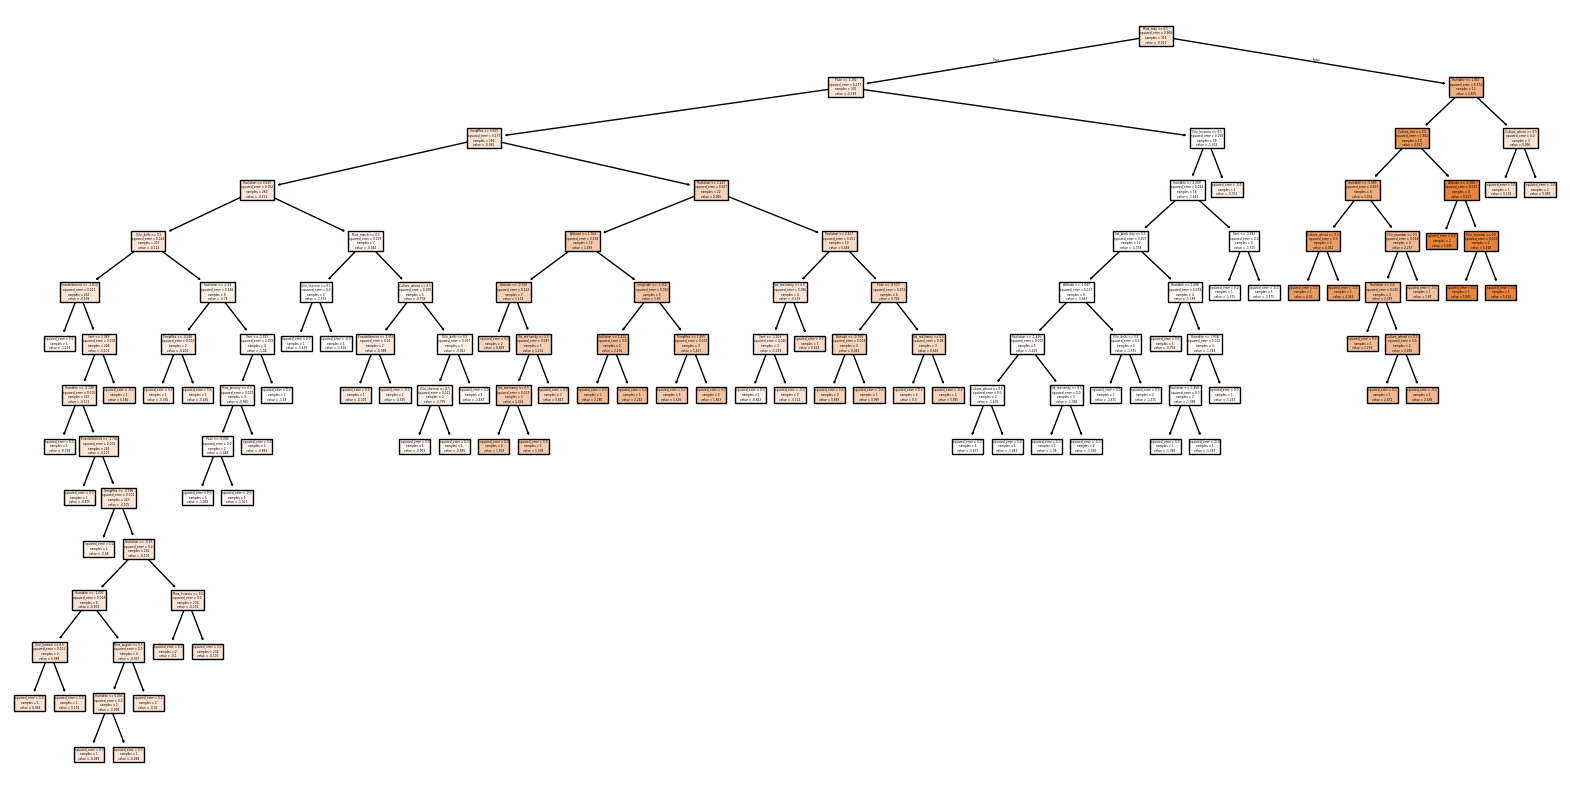

In [ ]:
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Charger le modèle
rf_model = joblib.load("../models/random_forest_model.pkl")

# Vérifier les noms de features utilisés par le modèle
feature_names = getattr(rf_model, "feature_names_in_", None)

if feature_names is None:
    raise ValueError("Impossible de récupérer les noms des features. Vérifie si le modèle a été entraîné avec Pandas.")

# Afficher un des arbres du modèle Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=feature_names)
plt.show()

**Visualisation du MLP**

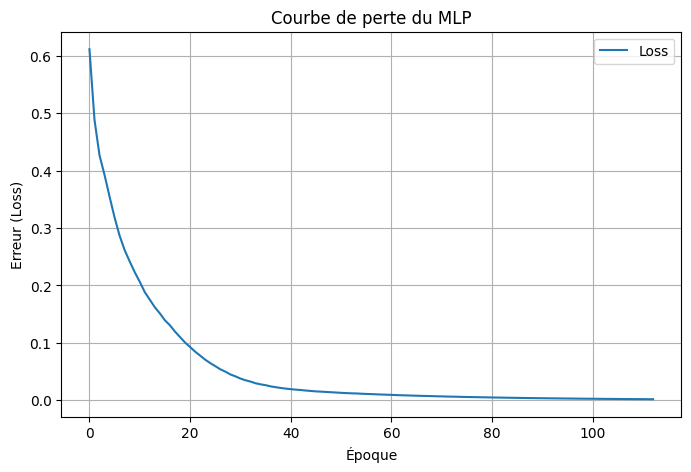


📌 Architecture du MLP :
🔹 Couche 1: 50 neurones
🔹 Couche 2: 50 neurones


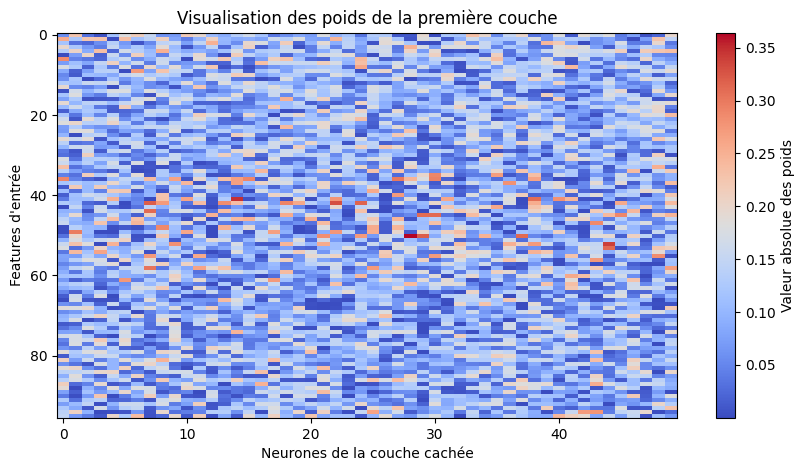

In [ ]:
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Charger le modèle MLP
mlp_model = joblib.load("../models/mlp_model.pkl")

# Vérifier si l'attribut `loss_curve_` existe
if hasattr(mlp_model, "loss_curve_"):
    plt.figure(figsize=(8, 5))
    plt.plot(mlp_model.loss_curve_, label="Loss")
    plt.xlabel("Époque")
    plt.ylabel("Erreur (Loss)")
    plt.title("Courbe de perte du MLP")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Le modèle MLP ne contient pas de courbe de perte.")

# Afficher la structure du réseau de neurones
print("\n📌 Architecture du MLP :")
for i, layer_size in enumerate(mlp_model.hidden_layer_sizes if hasattr(mlp_model, "hidden_layer_sizes") else []):
    print(f"🔹 Couche {i+1}: {layer_size} neurones")

# Afficher les poids d'une couche (exemple : première couche cachée)
if hasattr(mlp_model, "coefs_"):
    plt.figure(figsize=(10, 5))
    plt.imshow(np.abs(mlp_model.coefs_[0]), cmap="coolwarm", aspect="auto")
    plt.colorbar(label="Valeur absolue des poids")
    plt.xlabel("Neurones de la couche cachée")
    plt.ylabel("Features d'entrée")
    plt.title("Visualisation des poids de la première couche")
    plt.show()
else:
    print("Aucune information sur les poids du réseau.")


**Optimisation du Random Forest**

● Recherche des meilleurs hyperparamètres du modèle Random Forest (nombre d’arbres, profondeur des arbres, etc.).

● Évaluation des performances avec GridSearchCV.

● Sauvegarde du modèle optimisé.

In [ ]:

#  Définir les chemins
data_folder = "/content/" # Aller au dossier parent, puis dans data
models_folder = os.path.join( "..", "models")  # Aller au dossier parent, puis dans models
input_file_path = os.path.join(data_folder, "Pipeline.csv")  # Données d'entrée
output_model_path = os.path.join(models_folder, "best_random_forest.pkl")  # Modèle optimisé

# Vérifier si le fichier d'entrée existe
if not os.path.exists(input_file_path):
    raise FileNotFoundError(f"❌ Le fichier {input_file_path} n'existe pas.")

# Charger les données
data = pd.read_csv(input_file_path)
print(f"Fichier chargé avec {data.shape[0]} lignes et {data.shape[1]} colonnes !")

# Séparer les features (X) et la cible (y)
target_col = "BesoinEau"  # Remplace par la vraie colonne cible
X_train = data.drop(columns=[target_col])
y_train = data[target_col]

#  Définir le modèle
rf_model = RandomForestRegressor(random_state=42)

#  Définir la grille d’hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

#  Initialiser GridSearchCV
grid_search = GridSearchCV(
    rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2
)

#  Lancer l'optimisation
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et score
print("\n🔍 Meilleurs paramètres trouvés :", grid_search.best_params_)
print("📊 Meilleur score R² :", grid_search.best_score_)

#  Sauvegarder le meilleur modèle
best_rf_model = grid_search.best_estimator_
joblib.dump(best_rf_model, output_model_path)
print(f"\n✅ Modèle optimisé sauvegardé sous {output_model_path}")


✅ Fichier chargé avec 630 lignes et 97 colonnes !
Fitting 5 folds for each of 27 candidates, totalling 135 fits

🔍 Meilleurs paramètres trouvés : {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
📊 Meilleur score R² : -2.430811496991083e+28

✅ Modèle optimisé sauvegardé sous ../models/best_random_forest.pkl


**Visualisation du Random Forest Optimisé**

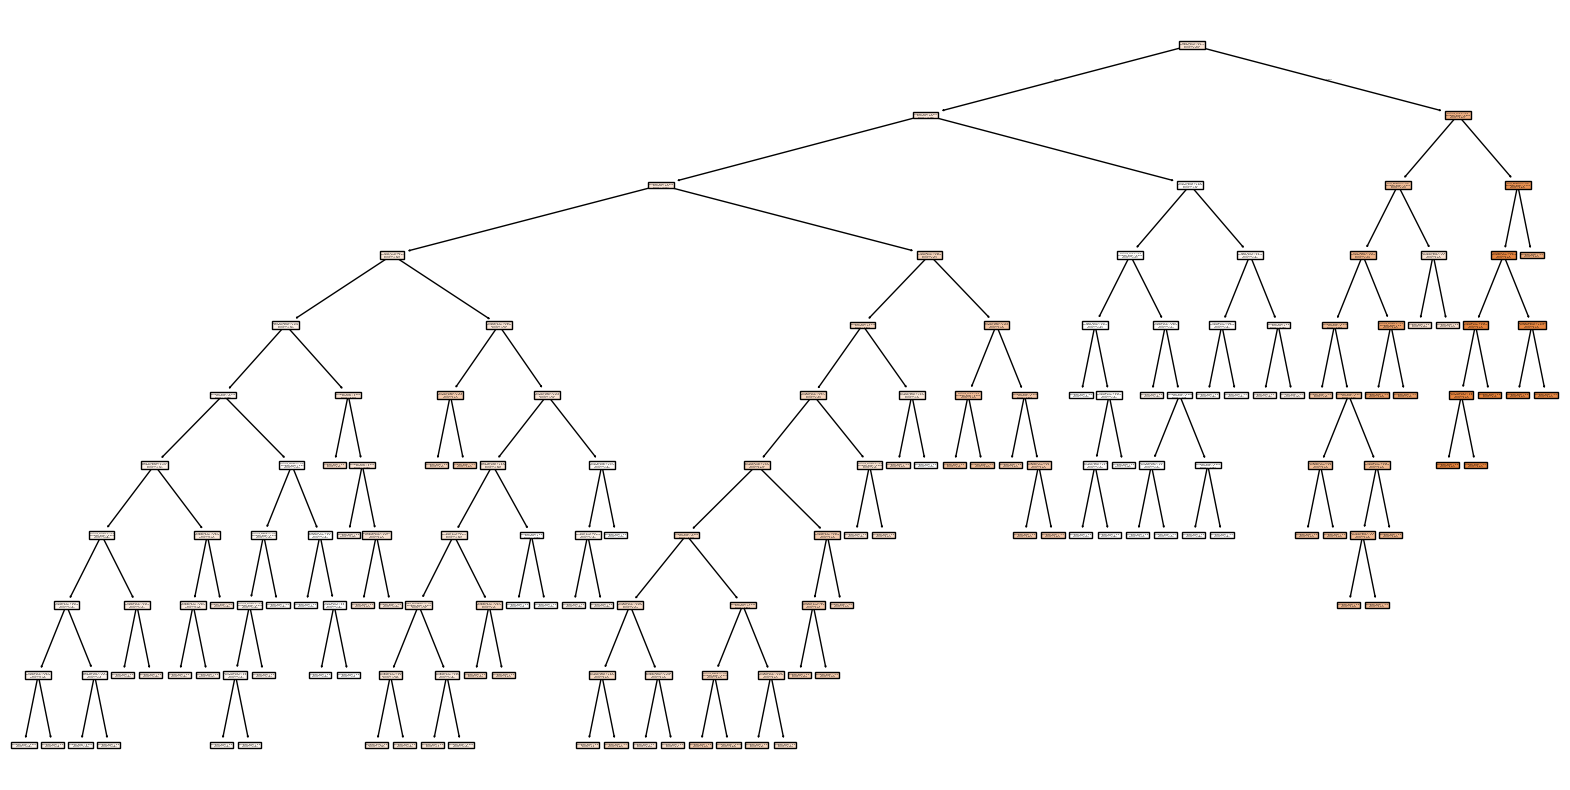

In [ ]:
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Charger le modèle
rf_model = joblib.load("../models/best_random_forest.pkl")

# Vérifier les noms de features utilisés par le modèle
feature_names = getattr(rf_model, "feature_names_in_", None)

if feature_names is None:
    raise ValueError("Impossible de récupérer les noms des features. Vérifie si le modèle a été entraîné avec Pandas.")

# Afficher un des arbres du modèle Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=feature_names)
plt.show()


**Optimisation du MLP**

● Ajustement des hyperparamètres du réseau de neurones (nombre de couches,
nombre de neurones par couche, fonction d’activation, etc.).
● Utilisation de GridSearchCV pour sélectionner la meilleure configuration.
● Sauvegarde du modèle amélioré.

In [ ]:

#  Définir les chemins
data_folder = "/content/"
models_folder = os.path.join( "..", "models")  # Aller au dossier parent, puis dans models
input_file_path = os.path.join(data_folder, "Pipeline.csv")  # Données d'entrée
output_model_path = os.path.join(models_folder, "best_mlp_model.pkl")  # Modèle optimisé

#  Vérifier si le fichier d'entrée existe
if not os.path.exists(input_file_path):
    raise FileNotFoundError(f"❌ Le fichier {input_file_path} n'existe pas.")

#  Charger les données
df = pd.read_csv(input_file_path)
print(f"Données chargées avec {df.shape[0]} lignes et {df.shape[1]} colonnes.")

#  Séparer les features (X) et la variable cible (y)
target_col = "BesoinEau"  # Modifier avec la vraie colonne cible !
X = df.drop(columns=[target_col])
y = df[target_col]

#  Diviser les données en train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"🔹 {X_train.shape[0]} lignes pour l'entraînement, {X_test.shape[0]} pour le test.")

#  Fonction d'évaluation du modèle
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {name} - Performance:")
    print(f"🔹 Mean Squared Error: {mse:.4f}")
    print(f"🔹 R² Score: {r2:.4f}")

#  Définir la grille d'hyperparamètres
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'max_iter': [200, 500],
}

#  Créer le modèle de MLP
mlp_model = MLPRegressor(random_state=42)

#  Recherche sur grille pour optimiser les hyperparamètres
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

#  Afficher les meilleurs paramètres trouvés
print("\n🔍 Meilleurs paramètres trouvés :", grid_search.best_params_)

#  Utiliser le meilleur modèle trouvé pour faire des prédictions
best_mlp_model = grid_search.best_estimator_
mlp_preds = best_mlp_model.predict(X_test)

#  Évaluation du modèle optimisé
evaluate_model("MLP optimisé", y_test, mlp_preds)

#  Sauvegarde du modèle optimisé
joblib.dump(best_mlp_model, output_model_path)
print(f"\n Modèle optimisé MLP sauvegardé sous {output_model_path}")


✅ Données chargées avec 630 lignes et 97 colonnes.
🔹 504 lignes pour l'entraînement, 126 pour le test.
Fitting 3 folds for each of 32 candidates, totalling 96 fits

🔍 Meilleurs paramètres trouvés : {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'max_iter': 500, 'solver': 'lbfgs'}

📊 MLP optimisé - Performance:
🔹 Mean Squared Error: 0.0302
🔹 R² Score: 0.9781

✅ Modèle optimisé MLP sauvegardé sous ../models/best_mlp_model.pkl


**Visualisation du MLP Optimisé**

Le modèle MLP ne contient pas de courbe de perte.

📌 Architecture du MLP optimisé :
🔹 Couche 1: 100 neurones


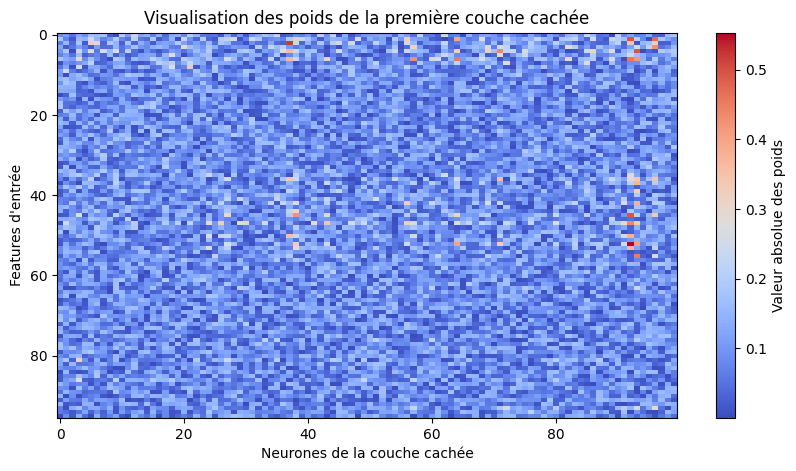

In [ ]:
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Charger le modèle MLP optimisé
mlp_model = joblib.load("../models/best_mlp_model.pkl")

# Vérifier si l'attribut `loss_curve_` existe pour afficher la courbe de perte
if hasattr(mlp_model, "loss_curve_"):
    plt.figure(figsize=(8, 5))
    plt.plot(mlp_model.loss_curve_, label="Loss")
    plt.xlabel("Époque")
    plt.ylabel("Erreur (Loss)")
    plt.title("Courbe de perte du MLP optimisé")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Le modèle MLP ne contient pas de courbe de perte.")

# Afficher la structure du réseau de neurones (nombre de neurones par couche cachée)
print("\n📌 Architecture du MLP optimisé :")
for i, layer_size in enumerate(mlp_model.hidden_layer_sizes if hasattr(mlp_model, "hidden_layer_sizes") else []):
    print(f"🔹 Couche {i+1}: {layer_size} neurones")

# Afficher les poids de la première couche cachée (si disponible)
if hasattr(mlp_model, "coefs_"):
    plt.figure(figsize=(10, 5))
    plt.imshow(np.abs(mlp_model.coefs_[0]), cmap="coolwarm", aspect="auto")
    plt.colorbar(label="Valeur absolue des poids")
    plt.xlabel("Neurones de la couche cachée")
    plt.ylabel("Features d'entrée")
    plt.title("Visualisation des poids de la première couche cachée")
    plt.show()
else:
    print("Aucune information sur les poids du réseau.")


**Évaluation et Comparaison des Modèles**

L’évaluation des modèles repose sur plusieurs indicateurs de performance permettant de mesurer la qualité des prédictions :

1.Mean Squared Error (MSE) : erreur quadratique moyenne. Plus sa valeur est faible, plus les prédictions du modèle sont proches des valeurs réelles.

2.Root Mean Squared Error (RMSE) : racine carrée du MSE, facilitant l’interprétation des erreurs dans l’unité de la variable cible.

3.Mean Absolute Error (MAE) : erreur absolue moyenne, mesurant la différence
moyenne entre les prédictions et les valeurs réelles.

4.R2 Score (coefficient de détermination) : indique la proportion de variance
expliquée par le modèle (entre 0 et 1). Une valeur proche de 1 signifie que le modèle est très précis.



In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#  Chemins des modèles
models_paths = {
    "Random Forest (Base)": "/models/random_forest_model.pkl",
    "Random Forest (Optimisé)": "/models/best_random_forest.pkl",
    "MLP (Base)": "/models/mlp_model.pkl",
    "MLP (Optimisé)": "/models/best_mlp_model.pkl"
}

#  Charger les modèles
models = {name: joblib.load(path) for name, path in models_paths.items()}
print("✅ Tous les modèles ont été chargés.")

#  Charger les données de test
file_path = "/content/Pipeline.csv"
df = pd.read_csv(file_path)

#  Vérifier que la colonne cible existe
target_col = "BesoinEau"
if target_col not in df.columns:
    raise ValueError(f"❌ La colonne cible '{target_col}' est introuvable dans les données.")

#  Séparer les features (X) et la variable cible (y)
X = df.drop(columns=[target_col])
y = df[target_col]

#  Charger les mêmes données de test utilisées dans `TrainModel.py`
from sklearn.model_selection import train_test_split
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Fonction d'évaluation des modèles
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n📊 {name} - Performance:")
    print(f"🔹 Mean Squared Error (MSE): {mse:.4f}")
    print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"🔹 Mean Absolute Error (MAE): {mae:.4f}")
    print(f"🔹 R² Score: {r2:.4f}")

#  Évaluer tous les modèles
for name, model in models.items():
    evaluate_model(name, model, X_test, y_test)


✅ Tous les modèles ont été chargés.

📊 Random Forest (Base) - Performance:
🔹 Mean Squared Error (MSE): 0.1426
🔹 Root Mean Squared Error (RMSE): 0.3776
🔹 Mean Absolute Error (MAE): 0.1233
🔹 R² Score: 0.8967

📊 Random Forest (Optimisé) - Performance:
🔹 Mean Squared Error (MSE): 0.0052
🔹 Root Mean Squared Error (RMSE): 0.0718
🔹 Mean Absolute Error (MAE): 0.0295
🔹 R² Score: 0.9963

📊 MLP (Base) - Performance:
🔹 Mean Squared Error (MSE): 0.0739
🔹 Root Mean Squared Error (RMSE): 0.2719
🔹 Mean Absolute Error (MAE): 0.1393
🔹 R² Score: 0.9465

📊 MLP (Optimisé) - Performance:
🔹 Mean Squared Error (MSE): 0.0302
🔹 Root Mean Squared Error (RMSE): 0.1738
🔹 Mean Absolute Error (MAE): 0.0811
🔹 R² Score: 0.9781
